### To predict the type of glass from the given attributes using various ensemble techniques for classifying

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\6.SLC\\Take Home\\Day 4\\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [19]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

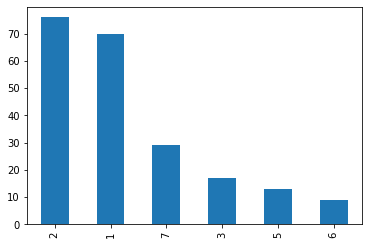

In [18]:
df['Type'].value_counts().plot(kind='bar')
plt.show()

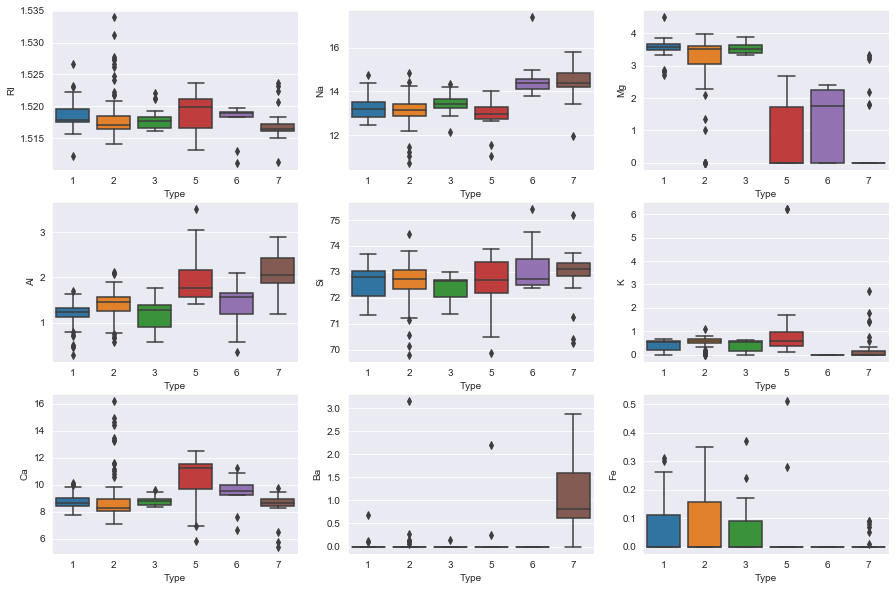

In [21]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(3,3,figsize=(15,10))
axes=axes.flatten()

for i in range(0,len(df.columns)-1):
    sns.boxplot(x='Type',y=df.iloc[:,i],ax=axes[i],data=df)

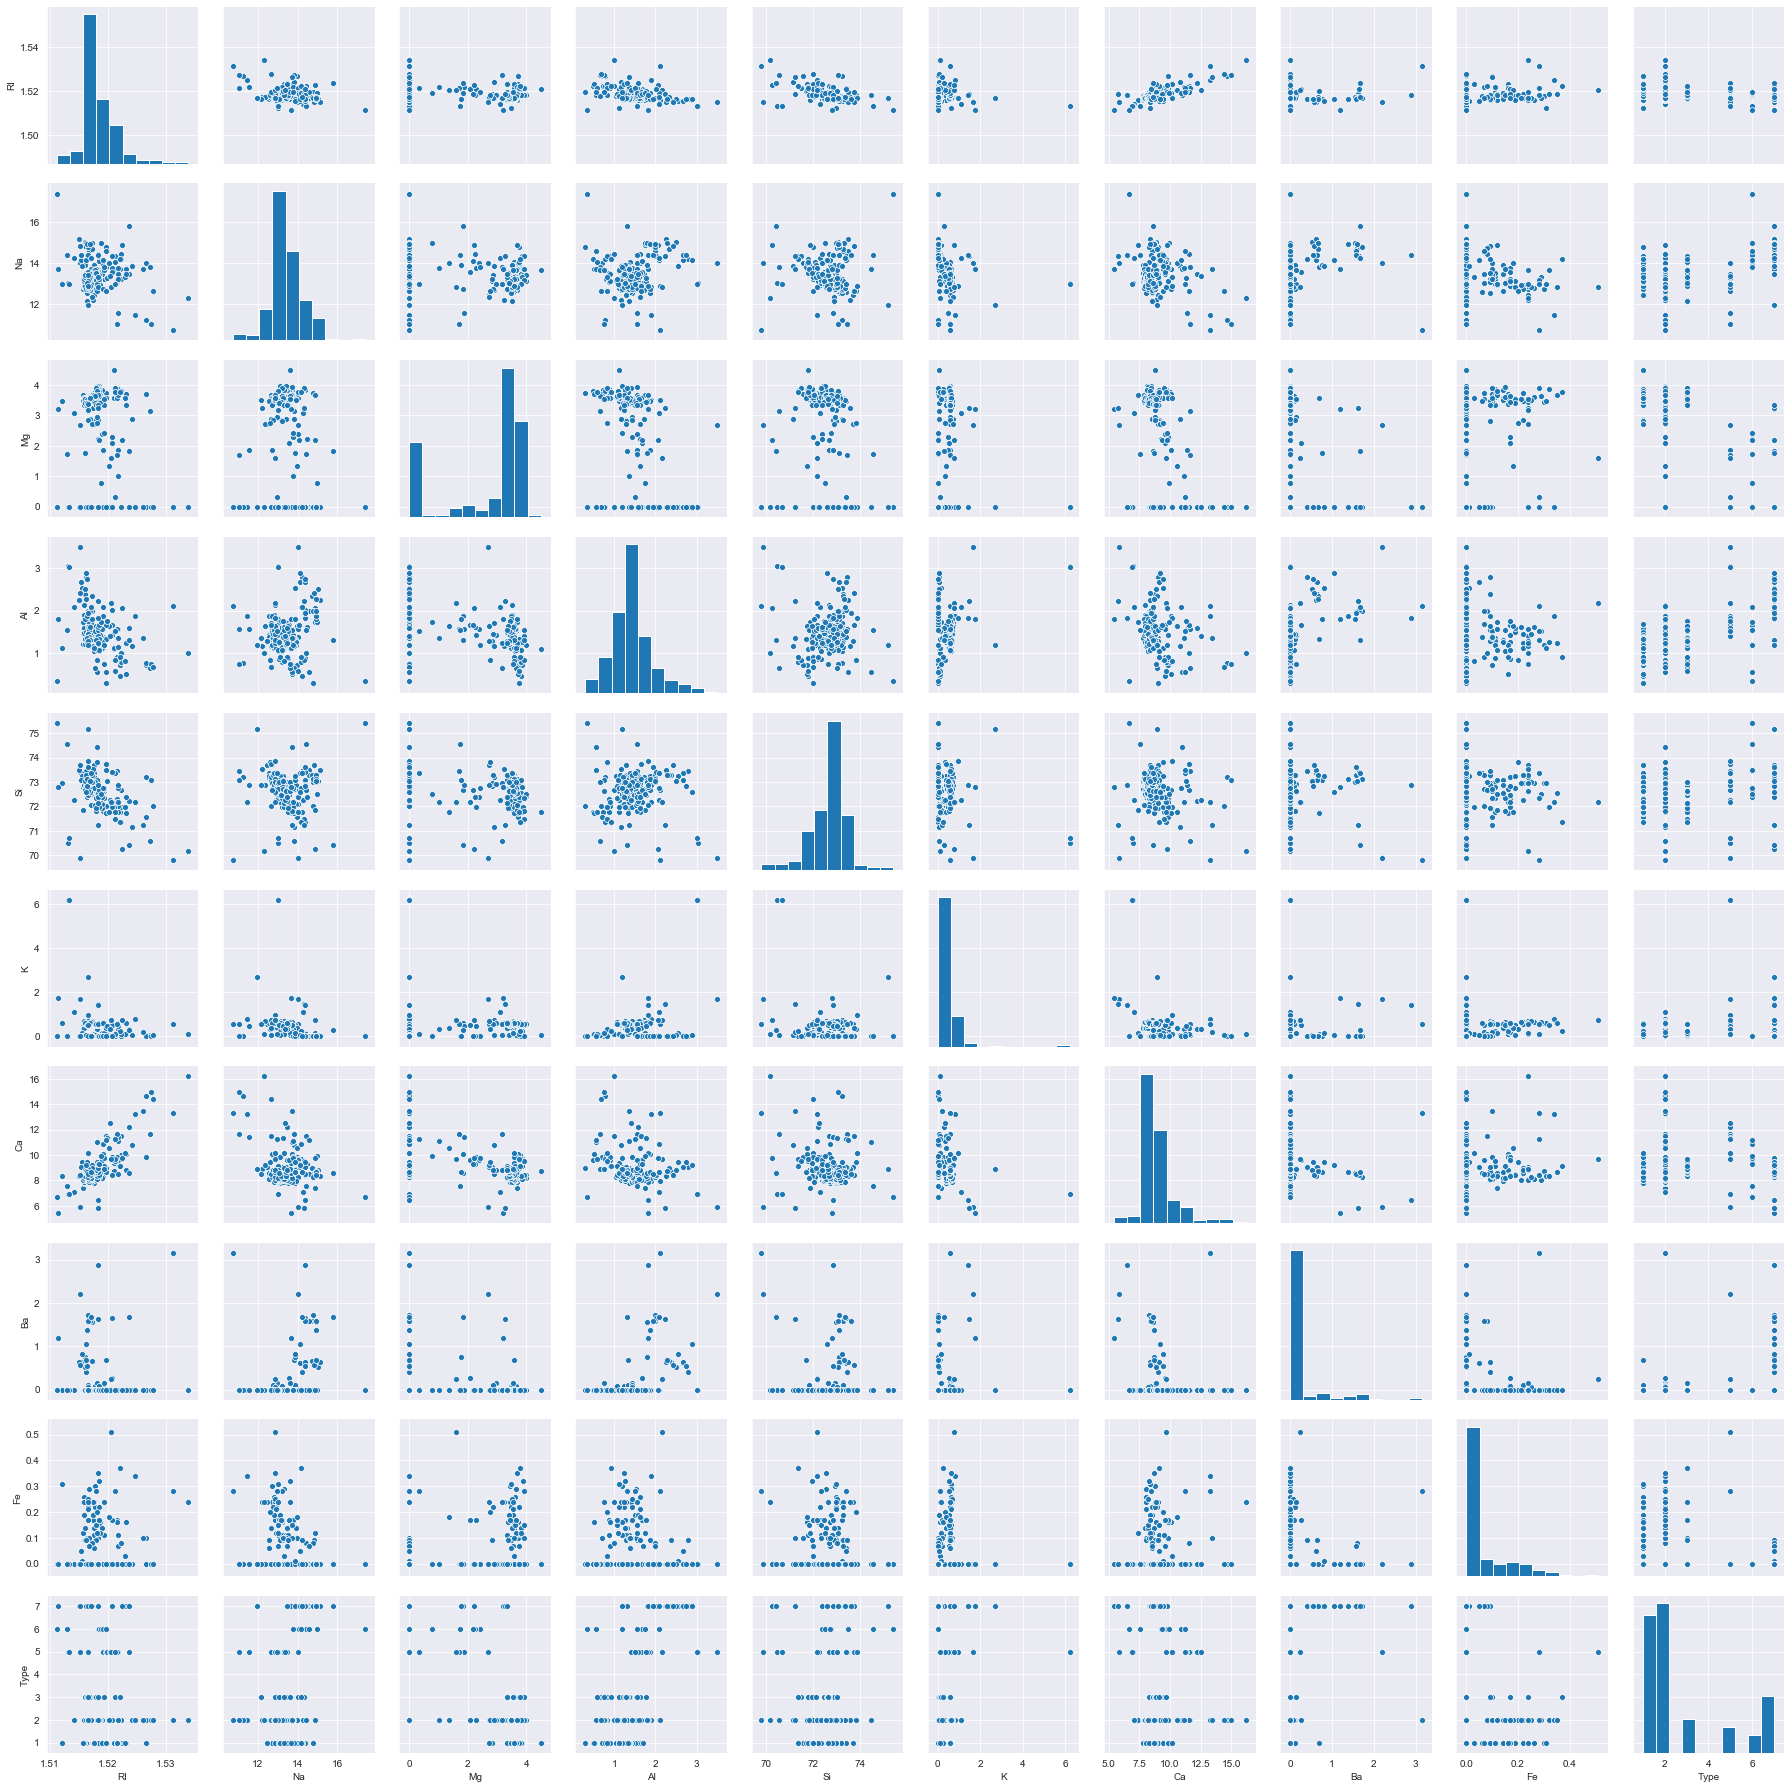

In [22]:
sns.pairplot(df)
plt.show()

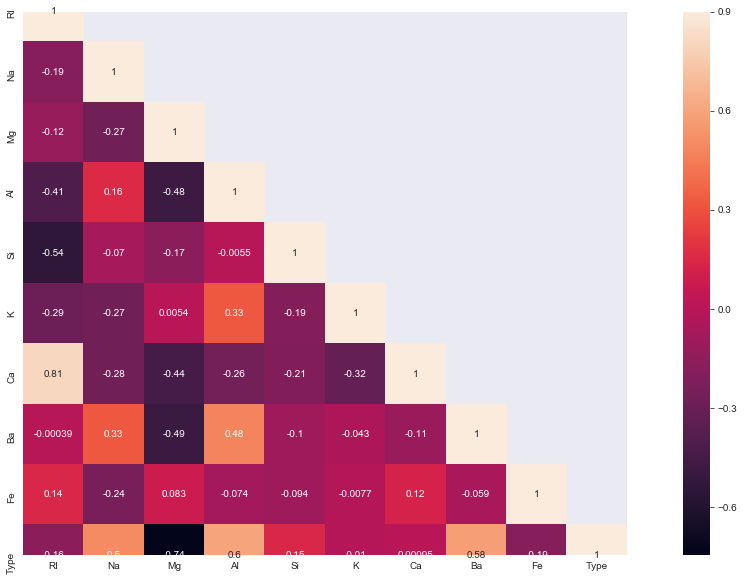

In [24]:
cor=df.corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,mask=mask,square=True,vmax=0.9)
plt.show()

In [3]:
X=df.drop('Type',axis=1)
y=df['Type']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [30]:
!pip install xgboost

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Bagging

In [10]:
from sklearn import tree
bgc=BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 6, min_samples_split=8))
rf=RandomForestClassifier(**rsearch_rf.best_params_,random_state=3)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve

In [11]:
classfiers=[bgc,rf]
names=['BaagingClassifier','RandomForest']

In [14]:
train_accuracy=[]
test_accuracy=[]

for name,clf in zip(names,classfiers):
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    accuracy_train=accuracy_score(y_train,y_train_pred)
    accuracy_test=accuracy_score(y_test,y_test_pred)
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    print('Train accuracy of:',name,'Algorithm:',accuracy_train)
    print('Test accuracy of:',name,'Algorithm:',accuracy_test)

Train accuracy of: BaagingClassifier Algorithm: 0.8926174496644296
Test accuracy of: BaagingClassifier Algorithm: 0.7538461538461538
Train accuracy of: RandomForest Algorithm: 0.9328859060402684
Test accuracy of: RandomForest Algorithm: 0.7846153846153846


In [25]:
importances

RI    0.157262
Na    0.084361
Mg    0.168503
Al    0.145000
Si    0.070528
K     0.096790
Ca    0.141545
Ba    0.099192
Fe    0.036820
dtype: float64

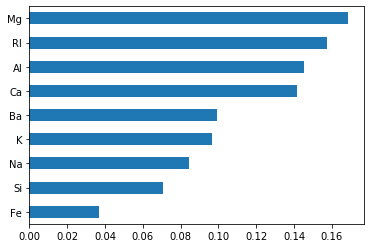

In [24]:
importances=pd.Series(rf.feature_importances_,index=X.columns)
importances.sort_values().plot(kind='barh')

In [118]:
summary_bagging=pd.DataFrame({'Algorithm':names,'Training Acuuracy':train_accuracy,'Testing Accuracy':test_accuracy})
summary_bagging

,Algorithm,Training Acuuracy,Testing Accuracy
0,BaagingClassifier,0.912752,0.723077
1,RandomForest,0.892617,0.784615


## Boosting

In [119]:
ada=AdaBoostClassifier(**rsearch_ada.best_params_,random_state=3)
gbm=GradientBoostingClassifier(**rsearch_gbm.best_params_,random_state=3)
lgbm=LGBMClassifier(**rsearch_lgbm.best_params_,random_state=3)
xgb=XGBClassifier(**rsearch_xgb.best_params_,random_state=3)

In [120]:
names=['AdaBoost','GradientBoostingMachine','LightGradientBoostingMachine','XGBoost']
classifiers=[ada,gbm,lgbm,xgb]

In [121]:
train_accuracy=[]
test_accuracy=[]

for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    y_test_pred=clf.predict(X_test)
    accuracy_train=accuracy_score(y_train,y_train_pred)
    accuracy_test=accuracy_score(y_test,y_test_pred)
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    print('Train accuracy of:',name,'Algorithm:',accuracy_train)
    print('Test accuracy of:',name,'Algorithm:',accuracy_test)

Train accuracy of: AdaBoost Algorithm: 0.8926174496644296
Test accuracy of: AdaBoost Algorithm: 0.6615384615384615
Train accuracy of: GradientBoostingMachine Algorithm: 0.8926174496644296
Test accuracy of: GradientBoostingMachine Algorithm: 0.7538461538461538
Train accuracy of: LightGradientBoostingMachine Algorithm: 0.8926174496644296
Test accuracy of: LightGradientBoostingMachine Algorithm: 0.7692307692307693
[20:48:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train accuracy of: XGBoost Algorithm: 0.8926174496644296
Test accuracy of: XGBoost Algorithm: 0.7384615384615385


In [122]:
summary_boosting=pd.DataFrame({'Algorithm':names,'Training Acuuracy':train_accuracy,'Testing Accuracy':test_accuracy})
summary_boosting

,Algorithm,Training Acuuracy,Testing Accuracy
0,AdaBoost,0.892617,0.661538
1,GradientBoostingMachine,0.892617,0.753846
2,LightGradientBoostingMachine,0.892617,0.769231
3,XGBoost,0.892617,0.738462


## Stacking

In [77]:
from sklearn.ensemble import VotingClassifier

### Hard Voting

In [ ]:
clf=VotingClassifier(estimators=[('BaggingClassifier',bgc),('RandomForrest',rf),('Adaboost',ada),('GBM',gbm),('LGBM',lgbm),('XGboost',xgb)],voting='hard')
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print('Accuracy of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy of test:',accuracy_score(y_test,y_test_pred))

### soft unweighted voting

In [124]:
clf=VotingClassifier(estimators=[('BaggingClassifier',bgc),('RandomForrest',rf),('Adaboost',ada),('GBM',gbm),('LGBM',lgbm),('XGboost',xgb)],voting='soft')
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print('Accuracy of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy of test:',accuracy_score(y_test,y_test_pred))

[20:49:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy of train: 0.9932885906040269
Accuracy of test: 0.7846153846153846


### soft weighted voting

In [125]:
clf=VotingClassifier(estimators=[('BaggingClassifier',bgc),('RandomForrest',rf),('Adaboost',ada),('GBM',gbm),('LGBM',lgbm),('XGboost',xgb)],voting='soft',weights=[1,2,2,1,2,2])
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print('Accuracy of train:',accuracy_score(y_train,y_train_pred))
print('Accuracy of test:',accuracy_score(y_test,y_test_pred))

[20:49:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy of train: 0.9731543624161074
Accuracy of test: 0.8


## Tuning hyperparameters of all classifiers

In [8]:
from sklearn.model_selection import RandomizedSearchCV

In [9]:
from scipy.stats import randint as sp_randint
rf=RandomForestClassifier()
n_estimators='warn',
params={'max_depth':sp_randint(1,10),
       'min_samples_split':sp_randint(2,10),
       'min_samples_leaf':sp_randint(1,10),
       'n_estimators':sp_randint(1,200)}

rsearch_rf=RandomizedSearchCV(rf,param_distributions=params,n_jobs=-1,return_train_score=True,cv=5,
                              random_state=3,scoring='accuracy')
rsearch_rf.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B7CD9B4D48>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B7CD9B7448>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B7CD9B09C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B7CD9D5E88>},
                   random_state=3, return_train_score=True, scoring='accuracy')

In [100]:
rsearch_rf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 108}

In [107]:
from scipy.stats import uniform as sp_uniform
lgbc=LGBMClassifier(random_state=3)

params={'n_estimators':sp_randint(50,200),
       'max_depth':sp_randint(1,10),
       'learning_rate':sp_uniform(0,0.5)}

rsearch_lgbm=RandomizedSearchCV(lgbc,param_distributions=params,cv=3,n_iter=100,scoring='accuracy',n_jobs=-1,random_state=3,
return_train_score=True)

rsearch_lgbm.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=3, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971D42D08>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000249716E46C8>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000249716E4A08>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [108]:
rsearch_lgbm.best_params_

{'learning_rate': 0.1016772629979491, 'max_depth': 1, 'n_estimators': 194}

In [109]:
ada=AdaBoostClassifier(random_state=3)

params={'n_estimators':sp_randint(50,200),
       'learning_rate':sp_uniform(0,0.5)}

rsearch_ada=RandomizedSearchCV(ada,param_distributions=params,cv=3,n_iter=100,scoring='accuracy',n_jobs=-1,random_state=3,
return_train_score=True)

rsearch_ada.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=3),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971AF9348>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971B60FC8>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [110]:
rsearch_ada.best_params_

{'learning_rate': 0.28611880979393933, 'n_estimators': 145}

In [111]:
gbm=GradientBoostingClassifier(random_state=3)

params={'n_estimators':sp_randint(50,200),
       'max_depth':sp_randint(1,10),
       'learning_rate':sp_uniform(0,0.5),
       'min_samples_split':sp_randint(2,10),
        'min_samples_leaf':sp_randint(1,10)}

rsearch_gbm=RandomizedSearchCV(gbm,param_distributions=params,cv=3,n_iter=100,scoring='accuracy',n_jobs=-1,random_state=3,
return_train_score=True)

rsearch_gbm.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971C56708>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971BD6F88>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971BD6308>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971BB3108>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_froze

In [112]:
rsearch_gbm.best_params_

{'learning_rate': 0.05810829321971095,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 185}

In [113]:
xgb=XGBClassifier(random_state=3)

params={'n_estimators':sp_randint(50,200),
       'max_depth':sp_randint(1,10),
       'learning_rate':sp_uniform(0,0.5),
       'min_samples_split':sp_randint(2,10),
        'min_samples_leaf':sp_randint(1,10)}

rsearch_xgb=RandomizedSearchCV(xgb,param_distributions=params,cv=3,n_iter=100,scoring='accuracy',n_jobs=-1,random_state=3,
return_train_score=True)

rsearch_xgb.fit(X,y)

[20:45:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024970AB71C8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971A6DF48>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024970A1E6C8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024971AD7588>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_froze

In [114]:
rsearch_xgb.best_params_

{'learning_rate': 0.022748652927934432,
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 175}